In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [16]:
# Read in csv files
realtor = pd.read_csv("../data/realtor_housing_metrics_state.csv")

national_realtor = pd.read_csv("../data/realtor_housing_metrics_country.csv")

median_income = pd.read_csv("../data/median_income_by_state.csv")

national_median_income = pd.read_csv("../data/income_updated.csv", index_col = [0])

In [17]:
# Converting to datetime column & creating year column
realtor['month_date_yyyymm'] = pd.to_datetime(realtor['month_date_yyyymm'])

realtor['year'] = realtor['month_date_yyyymm'].dt.year

realtor['month'] = realtor['month_date_yyyymm'].dt.month_name()

national_realtor['month_date_yyyymm'] = pd.to_datetime(national_realtor['month_date_yyyymm'])

national_realtor['year'] = national_realtor['month_date_yyyymm'].dt.year

national_realtor['month'] = national_realtor['month_date_yyyymm'].dt.month_name()

In [18]:
# Creating df for housing by state & housing for the whole country
state_housing_df = realtor.merge(median_income)

national_housing_df = national_realtor.merge(national_median_income)

state_housing_df.to_csv("../data/state_housing.csv", index = False)
national_housing_df.to_csv("../data/national_housing.csv", index = False)

national_housing_df = pd.read_csv('../data/national_housing.csv')

# Create affordability index line graph at national level

In [19]:
national_housing_df['month_date_yyyymm'] = pd.to_datetime(national_housing_df['month_date_yyyymm'])

In [20]:
# Take median income and divide by median listing price
national_housing_df['affordability_index'] = national_housing_df['median_income'] / national_housing_df['median_listing_price']

Text(0.5, 1.0, 'Income to Home Price Ratio Over Time')

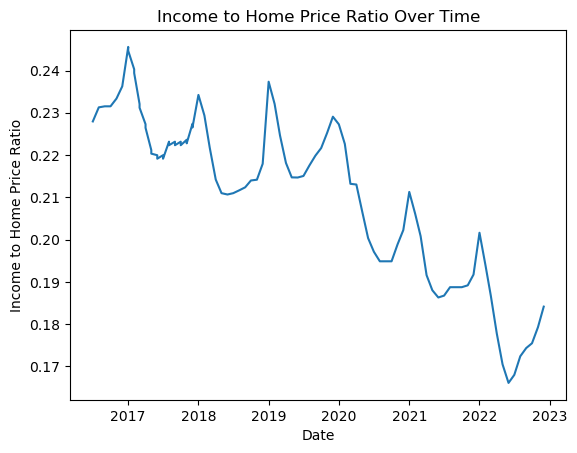

In [22]:
# Create line graph for national affordability index over several years
fig, ax = plt.subplots()
ax.plot(national_housing_df['month_date_yyyymm'], national_housing_df['affordability_index'])

# Set the title and axes
ax.set_xlabel('Date')
ax.set_ylabel('Income to Home Price Ratio')
ax.set_title('Income to Home Price Ratio Over Time')

(0.0, 0.35)

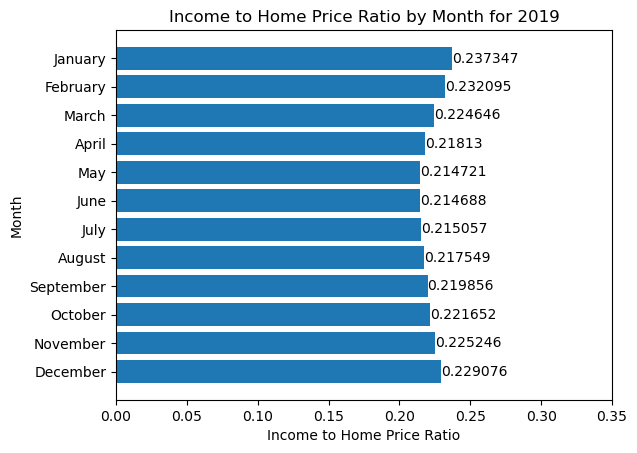

In [62]:
# Select the year
year = 2019

# Create dataframe filtered for selected year
filtered_df = national_housing_df.query(f'year == {year}')

# Define x and y
x = filtered_df['affordability_index']
y = filtered_df['month']

# Create horizontal bar chart for national affordability index by month
fig, ax = plt.subplots()
bars = ax.barh(y, x)

# Set the title and axes
ax.set_xlabel('Income to Home Price Ratio')
ax.set_ylabel('Month')
ax.set_title(f'Income to Home Price Ratio by Month for {year}')

ax.bar_label(bars)
ax.set_xlim(0,0.35)

# Create affordability index line graph by state

In [25]:
# Take median income and divide by median listing price
housing_df['affordability_index'] = housing_df['Households'] / housing_df['median_listing_price']

In [26]:
national_housing_df['affordability_index'] = national_housing_df['median_income'] / national_housing_df['median_listing_price']

In [27]:
state_housing_df['affordability_index'] = state_housing_df['Households'] / state_housing_df['median_listing_price']

In [35]:
states = ['Florida','Michigan','Tennessee']

state_housing_df[state_housing_df['state'].isin(states)]

,month_date_yyyymm,state,state_id,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,...,pending_ratio,quality_flag,year,month,Households,15 to 24 years,25 to 44 years,45 to 64 years,65 years and over,affordability_index
228,2022-12-01,Florida,FL,450000.0,89502.0,64.0,29752.0,1980.0,28328.0,42232.0,...,0.4719,0.0,2022,December,67917,41020,73861,80393,53384,0.150927
229,2022-11-01,Florida,FL,455000.0,89632.0,61.0,33738.0,1722.0,35910.0,44788.0,...,0.4997,0.0,2022,November,67917,41020,73861,80393,53384,0.149268
230,2022-10-01,Florida,FL,459900.0,84323.0,58.0,35456.0,1800.0,34164.0,48108.0,...,0.5705,0.0,2022,October,67917,41020,73861,80393,53384,0.147678
231,2022-09-01,Florida,FL,465000.0,81828.0,51.0,41008.0,2056.0,37556.0,53555.0,...,0.6545,0.0,2022,September,67917,41020,73861,80393,53384,0.146058
232,2022-08-01,Florida,FL,474500.0,80071.0,44.0,41680.0,2220.0,36210.0,54957.0,...,0.6864,0.0,2022,August,67917,41020,73861,80393,53384,0.143134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3961,2016-11-01,Florida,FL,300000.0,139417.0,76.0,41930.0,4950.0,41056.0,48970.0,...,0.3512,NaN,2016,November,48900,26344,51901,57398,39404,0.163000
3962,2016-10-01,Florida,FL,300000.0,136158.0,78.0,40220.0,4060.0,37900.0,50742.0,...,0.3727,NaN,2016,October,48900,26344,51901,57398,39404,0.163000
3963,2016-09-01,Florida,FL,299950.0,133846.0,76.0,40684.0,4314.0,39836.0,53107.0,...,0.3968,NaN,2016,September,48900,26344,51901,57398,39404,0.163027
3964,2016-08-01,Florida,FL,299900.0,134952.0,75.0,41430.0,4448.0,37378.0,55141.0,...,0.4086,NaN,2016,August,48900,26344,51901,57398,39404,0.163054


(0.0, 510354.2)

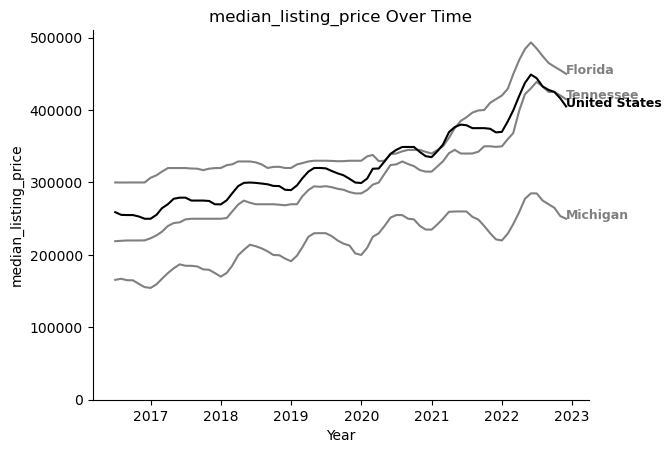

In [81]:
show_national = True

# Shows the affordability index over the years for the selected state
metric = 'median_listing_price'
states = ['Florida','Michigan','Tennessee']

# Subsetting dataframe for selected states
housing_for_state = state_housing_df[state_housing_df['state'].isin(states)]

# Create line graph for national affordability index over several years
fig, ax1 = plt.subplots()

for state in states:
    # Subset dataset for that state
    state_data = housing_for_state.query(f"state == '{state}'")

    # Plot line graph 
    ax1.plot(state_data['month_date_yyyymm'], state_data[f'{metric}'], color = 'grey')

    # Label the end of each line
    ax1.text(state_data['month_date_yyyymm'].iloc[0],
         state_data[f'{metric}'].iloc[0],
         state,
         fontsize = 9,
         ha = 'left',
         color = 'grey',
         fontweight = 'bold')

# Add a line for the entire united states
if show_national == True:
    ax1.plot(national_housing_df['month_date_yyyymm'], national_housing_df[f'{metric}'], color = 'black')
    
    ax1.text(national_housing_df['month_date_yyyymm'].iloc[0],
            national_housing_df[f'{metric}'].iloc[0],
            'United States',
            fontsize = 9,
            ha = 'left',
            color = 'black',
            fontweight = 'bold')

# Set the title and axes
ax1.set_xlabel('Year')
ax1.set_ylabel(f'{metric}')
ax1.set_title(f'{metric} Over Time')

# Remove the spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Define y range
ax1.set_ylim(bottom = 0)

# Create top/bottom 5 states by affordability index bar chart

In [50]:
state_housing_df

,month_date_yyyymm,state,state_id,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,...,pending_ratio,quality_flag,year,month,Households,15 to 24 years,25 to 44 years,45 to 64 years,65 years and over,affordability_index
0,2022-12-01,Rhode Island,RI,475000.0,1182.0,45.0,544.0,12.0,228.0,1268.0,...,1.0728,0.0,2022,December,81370,43688,86770,100530,56242,0.171305
1,2022-11-01,Rhode Island,RI,475000.0,1384.0,38.0,856.0,12.0,458.0,1462.0,...,1.0564,0.0,2022,November,81370,43688,86770,100530,56242,0.171305
2,2022-10-01,Rhode Island,RI,475000.0,1376.0,37.0,944.0,8.0,460.0,1620.0,...,1.1773,0.0,2022,October,81370,43688,86770,100530,56242,0.171305
3,2022-09-01,Rhode Island,RI,484475.0,1353.0,40.0,1006.0,4.0,414.0,1826.0,...,1.3496,0.0,2022,September,81370,43688,86770,100530,56242,0.167955
4,2022-08-01,Rhode Island,RI,482675.0,1460.0,34.0,1084.0,14.0,444.0,1932.0,...,1.3233,0.0,2022,August,81370,43688,86770,100530,56242,0.168581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3973,2016-11-01,Iowa,IA,164900.0,13242.0,73.0,3344.0,308.0,3052.0,3033.0,...,0.2290,NaN,2016,November,54570,27458,62191,67143,38140,0.330928
3974,2016-10-01,Iowa,IA,163950.0,13746.0,68.0,3896.0,320.0,3620.0,3327.0,...,0.2420,NaN,2016,October,54570,27458,62191,67143,38140,0.332845
3975,2016-09-01,Iowa,IA,162950.0,13855.0,67.0,4138.0,286.0,3712.0,3642.0,...,0.2629,NaN,2016,September,54570,27458,62191,67143,38140,0.334888
3976,2016-08-01,Iowa,IA,162950.0,13895.0,65.0,4458.0,338.0,3732.0,3866.0,...,0.2782,NaN,2016,August,54570,27458,62191,67143,38140,0.334888


[Text(0, 0, '539000'),
 Text(0, 0, '568730'),
 Text(0, 0, '575000'),
 Text(0, 0, '595000'),
 Text(0, 0, '599900'),
 Text(0, 0, '599900'),
 Text(0, 0, '649000'),
 Text(0, 0, '675000'),
 Text(0, 0, '695000'),
 Text(0, 0, '845000')]

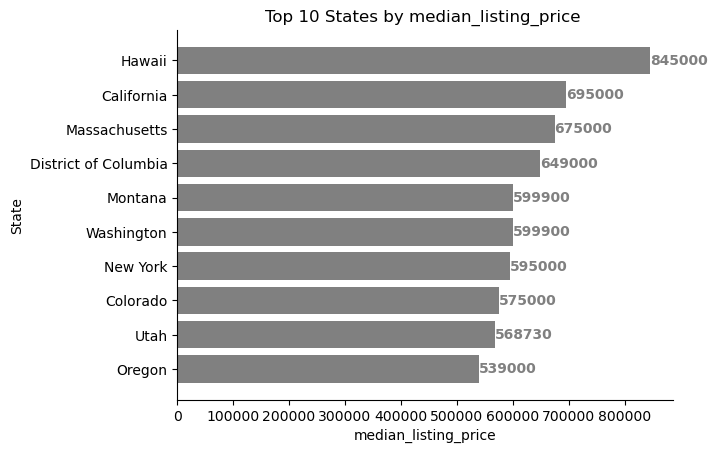

In [66]:
metric = 'median_listing_price'
month = 'December'
year = 2022

filtered_df = state_housing_df.query(f"year == {year} and month == '{month}'")\
.sort_values(f"{metric}", ascending = False).reset_index()

filtered_df = filtered_df[['month_date_yyyymm','state',f'{metric}']]
, ascending = False
top_10_states = filtered_df.head(10)
top_10_states = top_10_states.sort_values(by = f"{metric}", ascending = True)

bottom_10_states = filtered_df.tail(10)

# Define x and y
x = top_10_states[f'{metric}']
y = top_10_states['state']

# Create horizontal bar chart for national affordability index by month
fig, ax = plt.subplots()
bars = ax.barh(y, x, color = 'grey')

# Set the title and axes
ax.set_xlabel(f'{metric}')
ax.set_ylabel('State')
ax.set_title(f'Top 10 States by {metric} ')

# Remove the spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.bar_label(bars, color = 'grey', fontweight = 'bold')

# Let's get the % median listing price increase

- For each state we need to subtract the earliest median listing price from the most recent median listing price and divide by the earliest median listing price
- Then we'll have the percentage increase from the starting date of that state

In [79]:
# Sort the states from earliest date to latest
price_change = state_housing_df.sort_values(['state','month_date_yyyymm'])

# Grab the earliest price and most recent price
price_change = price_change.groupby('state').agg(earliest_price = ('median_listing_price','first'),
                                 latest_price = ('median_listing_price','last'))

# Calculate a percentage increase in price
price_change['percentage_increase'] = ((price_change['latest_price'] - price_change['earliest_price'])/ price_change['earliest_price']) * 100

# Reset the index
price_change = price_change.reset_index()

# Sort by the percentage increase and reset index
price_change = price_change.sort_values('percentage_increase', ascending = False)
price_change = price_change.reset_index(drop = True)

# Make a rank column
price_change = price_change = price_change.reset_index()\
.rename(columns = {'index': 'rank'})

# Add 1 to rank since index starts at 0
price_change['rank'] = price_change['rank'] + 1

# Subset data for selected columns: Rank, state, % increase
price_change = price_change[['rank','state','percentage_increase']]

# Convert to a csv file
price_change.to_csv('../data/mlp_percent_increase.csv', index = False)

#  Get 3 plots into one graph

In [84]:
def mlp_pricing_trend(states, show_national):
    
    # Define the metric used
    metric = 'median_listing_price'
    year = 2022
    month = 'December'

    # Defining top 10 states and bottom 10 states
    top_10_states = state_housing_df.query(f"year == {year} and month == '{month}'")\
    .sort_values(f"{metric}", ascending = False).reset_index()\
    [['month_date_yyyymm','state',f'{metric}']].head(10)

    top_10_states = top_10_states['state'].unique()

    bottom_10_states = state_housing_df.query(f"year == {year} and month == '{month}'")\
    .sort_values(f"{metric}", ascending = False).reset_index()\
    [['month_date_yyyymm','state',f'{metric}']].tail(10)

    bottom_10_states = bottom_10_states['state'].unique()

    # Subsetting dataframe for selected states
    housing_for_state = state_housing_df[state_housing_df['state'].isin(states)]

    # Create line graph for median listing price over several years
    fig, ax1 = plt.subplots()

    for state in states:
        # Subset dataset for that state
        state_data = housing_for_state.query(f"state == '{state}'")
        
        if state in top_10_states:
            # Plot line graph 
            ax1.plot(state_data['month_date_yyyymm'], state_data[f'{metric}'], color = 'blue')
            
            # Label the end of each line
            ax1.text(state_data['month_date_yyyymm'].iloc[0],
                state_data[f'{metric}'].iloc[0],
                state,
                fontsize = 9,
                ha = 'left',
                color = 'blue',
                fontweight = 'bold')
        
        elif state in bottom_10_states:
            # Plot line graph 
            ax1.plot(state_data['month_date_yyyymm'], state_data[f'{metric}'], color = 'red')

            # Label the end of each line
            ax1.text(state_data['month_date_yyyymm'].iloc[0],
            state_data[f'{metric}'].iloc[0],
            state,
            fontsize = 9,
            ha = 'left',
            color = 'red',
            fontweight = 'bold')
        
        else:
            # Plot line graph 
            ax1.plot(state_data['month_date_yyyymm'], state_data[f'{metric}'], color = 'grey')

            # Label the end of each line
            ax1.text(state_data['month_date_yyyymm'].iloc[0],
            state_data[f'{metric}'].iloc[0],
            state,
            fontsize = 9,
            ha = 'left',
            color = 'grey',
            fontweight = 'bold')   
        
    # Add a line for the entire united states
    if show_national == True:
        ax1.plot(national_housing_df['month_date_yyyymm'], national_housing_df[f'{metric}'], color = 'black')
        
        ax1.text(national_housing_df['month_date_yyyymm'].iloc[0],
                national_housing_df[f'{metric}'].iloc[0],
                'United States',
                fontsize = 9,
                ha = 'left',
                color = 'black',
                fontweight = 'bold')
        
    # Set the title and axes
    ax1.set_ylabel(f'{metric}')
    ax1.set_title(f'{metric} Over Time', loc = 'left')

    # Remove the spines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    # Define y range
    ax1.set_ylim(bottom = 0)

    # Return the figure
    return(fig)

# Function that takes in metric, month, and year and returns the top 10 states for that specific metric in the given timeframe
def top_10_mlp(metric,month,year):

    filtered_df = state_housing_df.query(f"year == {year} and month == '{month}'")\
    .sort_values(f"{metric}", ascending = False).reset_index()

    filtered_df = filtered_df[['month_date_yyyymm','state',f'{metric}']]
    top_10_states = filtered_df.head(10)
    top_10_states = top_10_states.sort_values(by = f"{metric}", ascending = True)

    # Define x and y
    x = top_10_states[f'{metric}']
    y = top_10_states['state']

    # Create horizontal bar chart for national affordability index by month
    fig, ax = plt.subplots()
    bars = ax.barh(y, x, color = 'grey')

    # Highlight a specific state
    for bar, state in zip(bars, y):
        if state in states:
            bar.set_color('blue')

    # Set the title and axes
    ax.set_xlabel(f'{metric}')
    ax.set_title(f'Top 10 States by {metric} ')

    # Remove the spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Label the bar numbers
    ax.bar_label(bars, color = 'white', padding = -50)

    # Set the x range
    ax.set_xlim((0,900000))

    return fig

# Function that takes in metric, month, and year and returns the bottom 10 states for that specific metric in the given timeframe
def bottom_10_mlp(metric,month,year):

    filtered_df = state_housing_df.query(f"year == {year} and month == '{month}'")\
    .sort_values(f"{metric}", ascending = False).reset_index()

    filtered_df = filtered_df[['month_date_yyyymm','state',f'{metric}']]
    bottom_10_states = filtered_df.tail(10)
    bottom_10_states = bottom_10_states.sort_values(by = f"{metric}", ascending = True)

    # Define x and y
    x = bottom_10_states[f'{metric}']
    y = bottom_10_states['state']

    # Create horizontal bar chart for national affordability index by month
    fig, ax = plt.subplots()
    bars = ax.barh(y, x, color = 'grey')

    # Highlight a specific state
    for bar, state in zip(bars, y):
        if state in states:
            bar.set_color('red')

    # Set the title and axes
    ax.set_xlabel(f'{metric}')
    ax.set_title(f'Bottom 10 States by {metric} ')

    # Remove the spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Label the bar numbers
    ax.bar_label(bars, color = 'white', padding = -50)

    # Set x range
    ax.set_xlim((0,900000))

    return fig

(0.0, 900000.0)

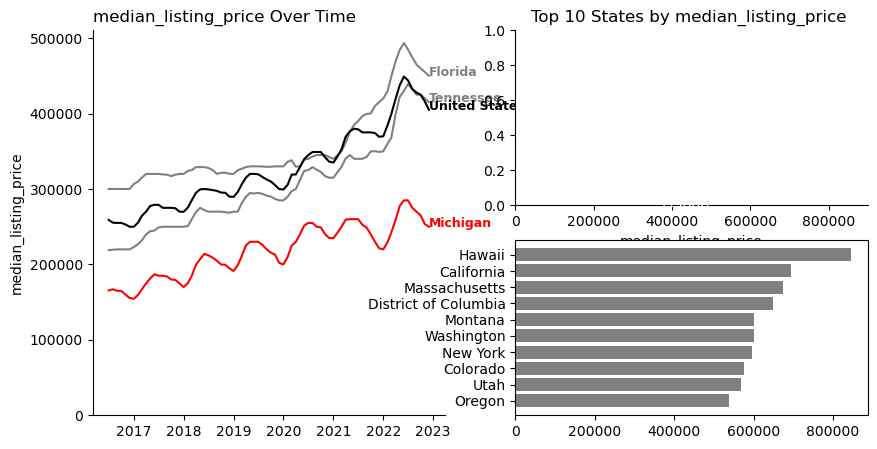

In [93]:
fig = plt.figure(figsize = (10,5))
gs = gridspec.GridSpec(2,2, width_ratios = [1,1], height_ratios = [1,1])

ax1 = plt.subplot(gs[:,0]) # Left half plot
ax2 = plt.subplot(gs[0,1]) # Right top half plot
ax3 = plt.subplot(gs[1,1]) # Bottom right plot

# Define the metric used
metric = 'median_listing_price'
year = 2022
month = 'December'

# Defining top 10 states and bottom 10 states
top_10_states = state_housing_df.query(f"year == {year} and month == '{month}'")\
.sort_values(f"{metric}", ascending = False).reset_index()\
[['month_date_yyyymm','state',f'{metric}']].head(10)

top_10_states = top_10_states['state'].unique()

bottom_10_states = state_housing_df.query(f"year == {year} and month == '{month}'")\
.sort_values(f"{metric}", ascending = False).reset_index()\
[['month_date_yyyymm','state',f'{metric}']].tail(10)

bottom_10_states = bottom_10_states['state'].unique()

# Subsetting dataframe for selected states
housing_for_state = state_housing_df[state_housing_df['state'].isin(states)]

for state in states:
    # Subset dataset for that state
    state_data = housing_for_state.query(f"state == '{state}'")

    if state in top_10_states:
        # Plot line graph 
        ax1.plot(state_data['month_date_yyyymm'], state_data[f'{metric}'], color = 'blue')

        # Label the end of each line
        ax1.text(state_data['month_date_yyyymm'].iloc[0],
            state_data[f'{metric}'].iloc[0],
            state,
            fontsize = 9,
            ha = 'left',
            color = 'blue',
            fontweight = 'bold')

    elif state in bottom_10_states:
        # Plot line graph 
        ax1.plot(state_data['month_date_yyyymm'], state_data[f'{metric}'], color = 'red')

        # Label the end of each line
        ax1.text(state_data['month_date_yyyymm'].iloc[0],
        state_data[f'{metric}'].iloc[0],
        state,
        fontsize = 9,
        ha = 'left',
        color = 'red',
        fontweight = 'bold')

    else:
        # Plot line graph 
        ax1.plot(state_data['month_date_yyyymm'], state_data[f'{metric}'], color = 'grey')

        # Label the end of each line
        ax1.text(state_data['month_date_yyyymm'].iloc[0],
        state_data[f'{metric}'].iloc[0],
        state,
        fontsize = 9,
        ha = 'left',
        color = 'grey',
        fontweight = 'bold')   

# Add a line for the entire united states
if show_national == True:
    ax1.plot(national_housing_df['month_date_yyyymm'], national_housing_df[f'{metric}'], color = 'black')

    ax1.text(national_housing_df['month_date_yyyymm'].iloc[0],
            national_housing_df[f'{metric}'].iloc[0],
            'United States',
            fontsize = 9,
            ha = 'left',
            color = 'black',
            fontweight = 'bold')

# Set the title and axes
ax1.set_ylabel(f'{metric}')
ax1.set_title(f'{metric} Over Time', loc = 'left')

# Remove the spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Define y range
ax1.set_ylim(bottom = 0)

# Putting plot on ax 2
filtered_df = state_housing_df.query(f"year == {year} and month == '{month}'")\
.sort_values(f"{metric}", ascending = False).reset_index()

filtered_df = filtered_df[['month_date_yyyymm','state',f'{metric}']]
top_10_states = filtered_df.head(10)
top_10_states = top_10_states.sort_values(by = f"{metric}", ascending = True)

# Define x and y
x = top_10_states[f'{metric}']
y = top_10_states['state']

# Create horizontal bar chart for national affordability index by month
bars = plt.barh(y, x, color = 'grey')

# Highlight a specific state
for bar, state in zip(bars, y):
    if state in states:
        bar.set_color('blue')

# Set the title and axes
ax2.set_xlabel(f'{metric}')
ax2.set_title(f'Top 10 States by {metric} ')

# Remove the spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Label the bar numbers
ax2.bar_label(bars, color = 'white', padding = -50)

# Set the x range
ax2.set_xlim((0,900000))

Gridspec doesn't look like it'll work for the streamlit dashboard

In [95]:
mlp_increase = pd.read_csv("../data/mlp_percent_increase.csv")

In [96]:
mlp_increase

,rank,state,percentage_increase
0,1,Idaho,98.534052
1,2,Montana,93.578574
2,3,New York,92.868720
3,4,Tennessee,89.584285
4,5,Wisconsin,82.680085
5,6,New Hampshire,81.225082
6,7,Indiana,79.797980
7,8,Nebraska,78.947368
8,9,Utah,74.993846
9,10,Washington,74.414886


In [98]:
# Define selected states
states = ['Tennessee','Michigan','Hawaii']

In [106]:
def percentage_increase_plot(states):   
    # Subset data for the selected states
    filtered_df = mlp_increase[mlp_increase['state'].isin(states)]\
    .sort_values(by = 'percentage_increase', ascending = True)

    # Define x and y for the plot
    x = filtered_df['percentage_increase']
    y = filtered_df['state']

    # Create horizontal bar chart for national affordability index by month
    fig, ax = plt.subplots()
    bars = ax.barh(y, x, color = 'grey')

    # Remove the spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Label the bar numbers
    ax.bar_label(bars, color = 'white', padding = -50)

    return fig